In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def morlet_wavelet(t):
    alpha = 2
    return np.exp(-(t ** 2) / alpha) * np.exp(2 * np.pi * t * 1j)

c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


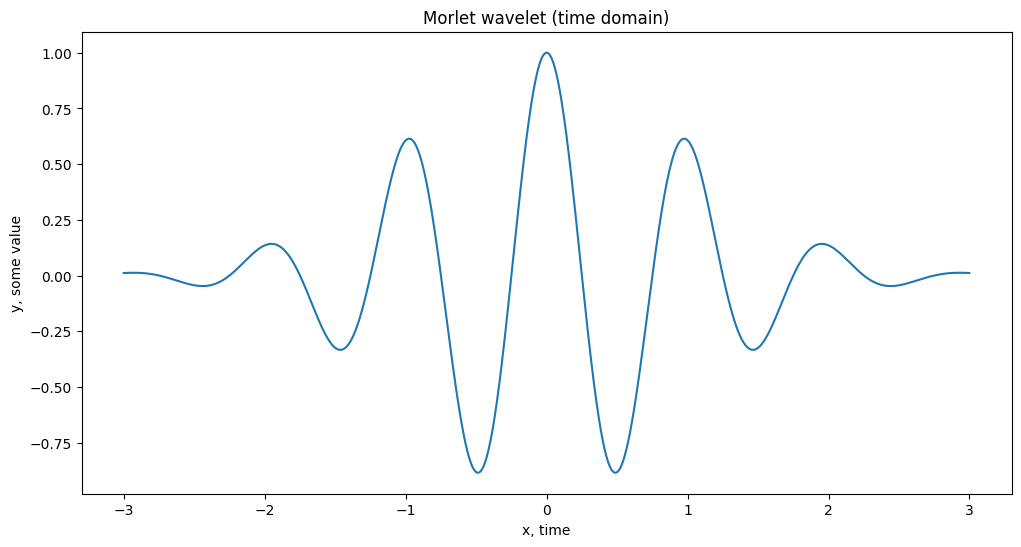

In [3]:
x_morlet = np.arange(-3, 3, 1 / 600)
y_morlet = morlet_wavelet(x_morlet)

plt.figure(figsize=(12, 6))
plt.plot(x_morlet, y_morlet)
plt.title("Morlet wavelet (time domain)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

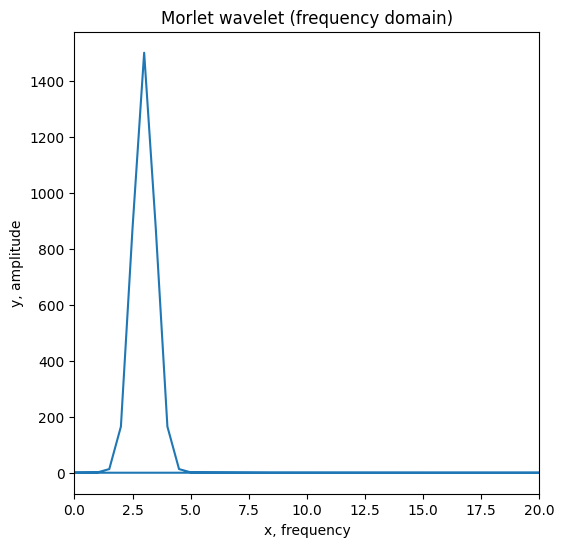

In [4]:
y_morlet_fft = np.fft.fft(y_morlet)
x_morlet_fft = np.fft.fftfreq(len(y_morlet_fft), 2 / len(y_morlet_fft))

plt.figure(figsize=(6, 6))
plt.plot(x_morlet_fft, np.abs(y_morlet_fft))
plt.xlim([0, 20])
plt.title("Morlet wavelet (frequency domain)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")
plt.show()

In [5]:
def mexican_hat_wavelet(t):
    return (1 - t ** 2) * np.exp(-(t ** 2) / 2)

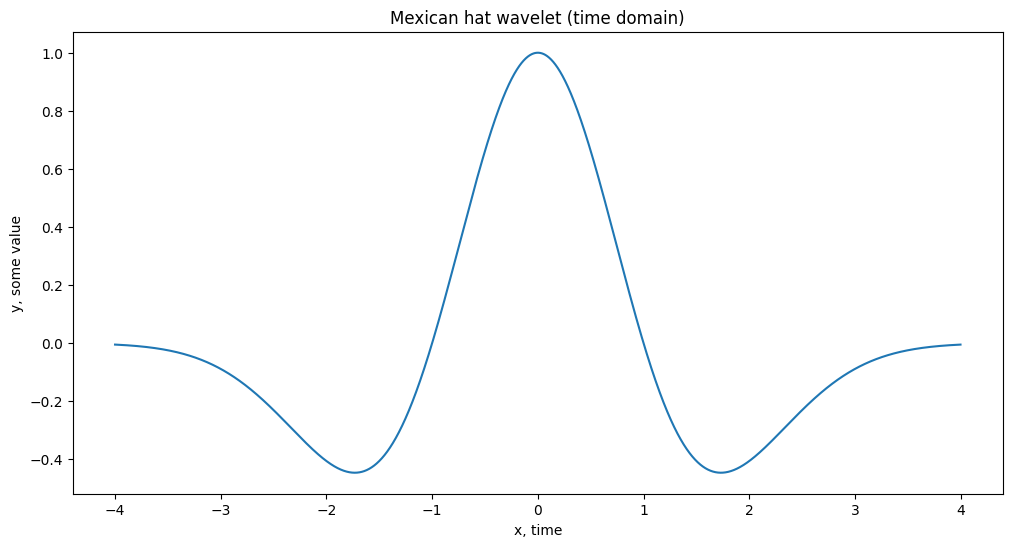

In [6]:
x_mexican_hat = np.arange(-4, 4, 1 / 800)
y_mexican_hat = mexican_hat_wavelet(x_mexican_hat)

plt.figure(figsize=(12, 6))
plt.plot(x_mexican_hat, y_mexican_hat)
plt.title("Mexican hat wavelet (time domain)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

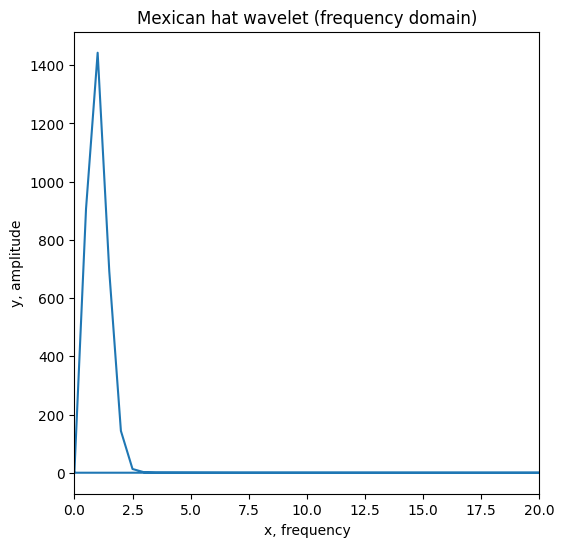

In [7]:
y_mexican_hat_fft = np.fft.fft(y_mexican_hat)
x_mexican_hat_fft = np.fft.fftfreq(len(y_mexican_hat_fft), 2 / len(y_mexican_hat_fft))

plt.figure(figsize=(6, 6))
plt.plot(x_mexican_hat_fft, np.abs(y_mexican_hat_fft))
plt.xlim([0, 20])
plt.title("Mexican hat wavelet (frequency domain)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")
plt.show()

In [8]:
def haar_wavelet(t):
    if 0 <= t and t < 0.5:
        return 1
    elif 0.5 <= t < 1:
        return -1
    else:
        return 0

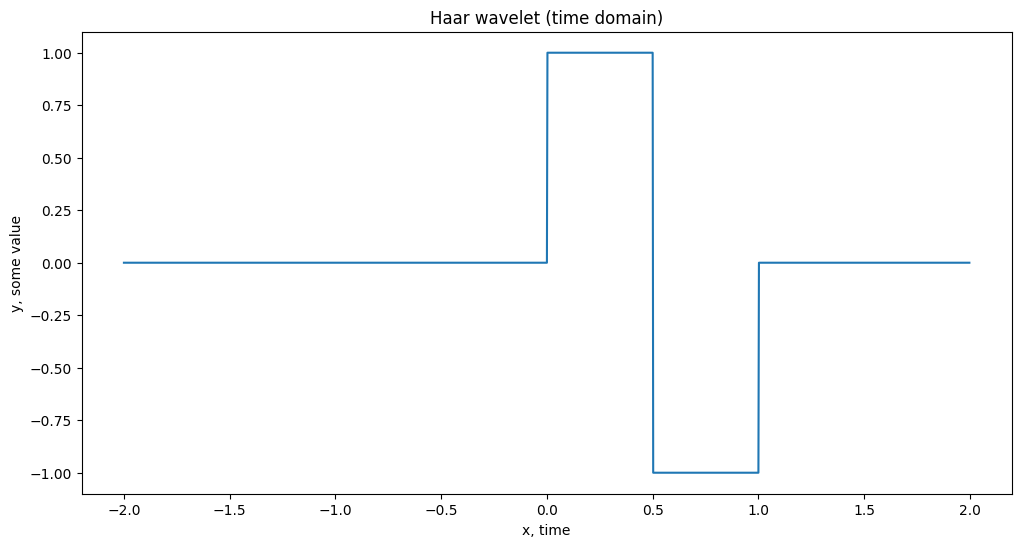

In [9]:
x_haar = np.arange(-2, 2, 1 / 400)
y_haar = np.array([haar_wavelet(element) for element in x_haar])

plt.figure(figsize=(12, 6))
plt.plot(x_haar, y_haar)
plt.title("Haar wavelet (time domain)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

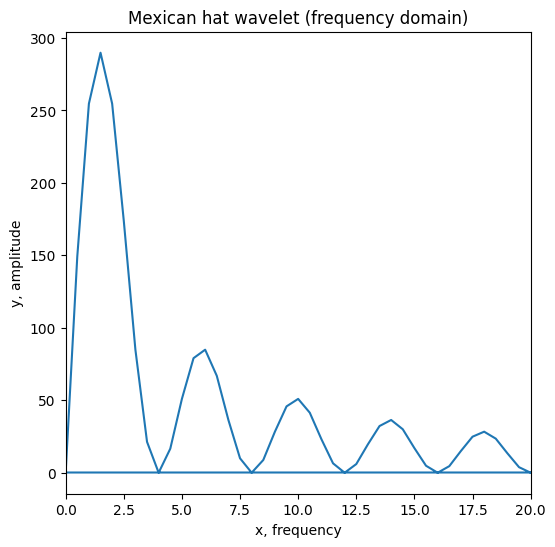

In [10]:
y_haar_fft = np.fft.fft(y_haar)
x_haar_fft = np.fft.fftfreq(len(y_haar_fft), 2 / len(y_haar_fft))

plt.figure(figsize=(6, 6))
plt.plot(x_haar_fft, np.abs(y_haar_fft))
plt.xlim([0, 20])
plt.title("Mexican hat wavelet (frequency domain)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")
plt.show()

In [11]:
def cos_func(x):
    f1 = 0.5
    f2 = 0.8
    f3 = 2
    w1 = 2 * np.pi * f1
    w2 = 2 * np.pi * f2
    w3 = 2 * np.pi * f3
    return np.cos(w1 * x) + np.cos(w2 * x) + np.cos(w3 * x) * np.exp(-x / 2)

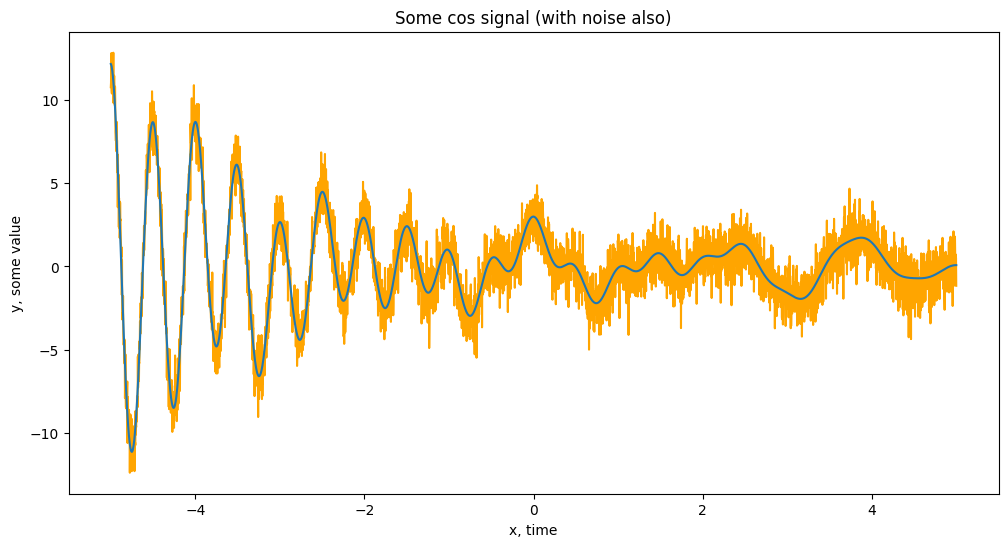

In [12]:
x_cos = np.linspace(-5, 5, 4000)
y_cos = cos_func(x_cos)
y_cos_noise = y_cos + np.random.normal(0, 1, 4000)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'orange')
plt.plot(x_cos, y_cos)
plt.title("Some cos signal (with noise also)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [13]:
kernel_args = np.linspace(-4, 4, 600)

kernel_morlet = morlet_wavelet(kernel_args)
kernel_mexican_hat = mexican_hat_wavelet(kernel_args)
kernel_haar = np.array([haar_wavelet(arg) for arg in kernel_args])

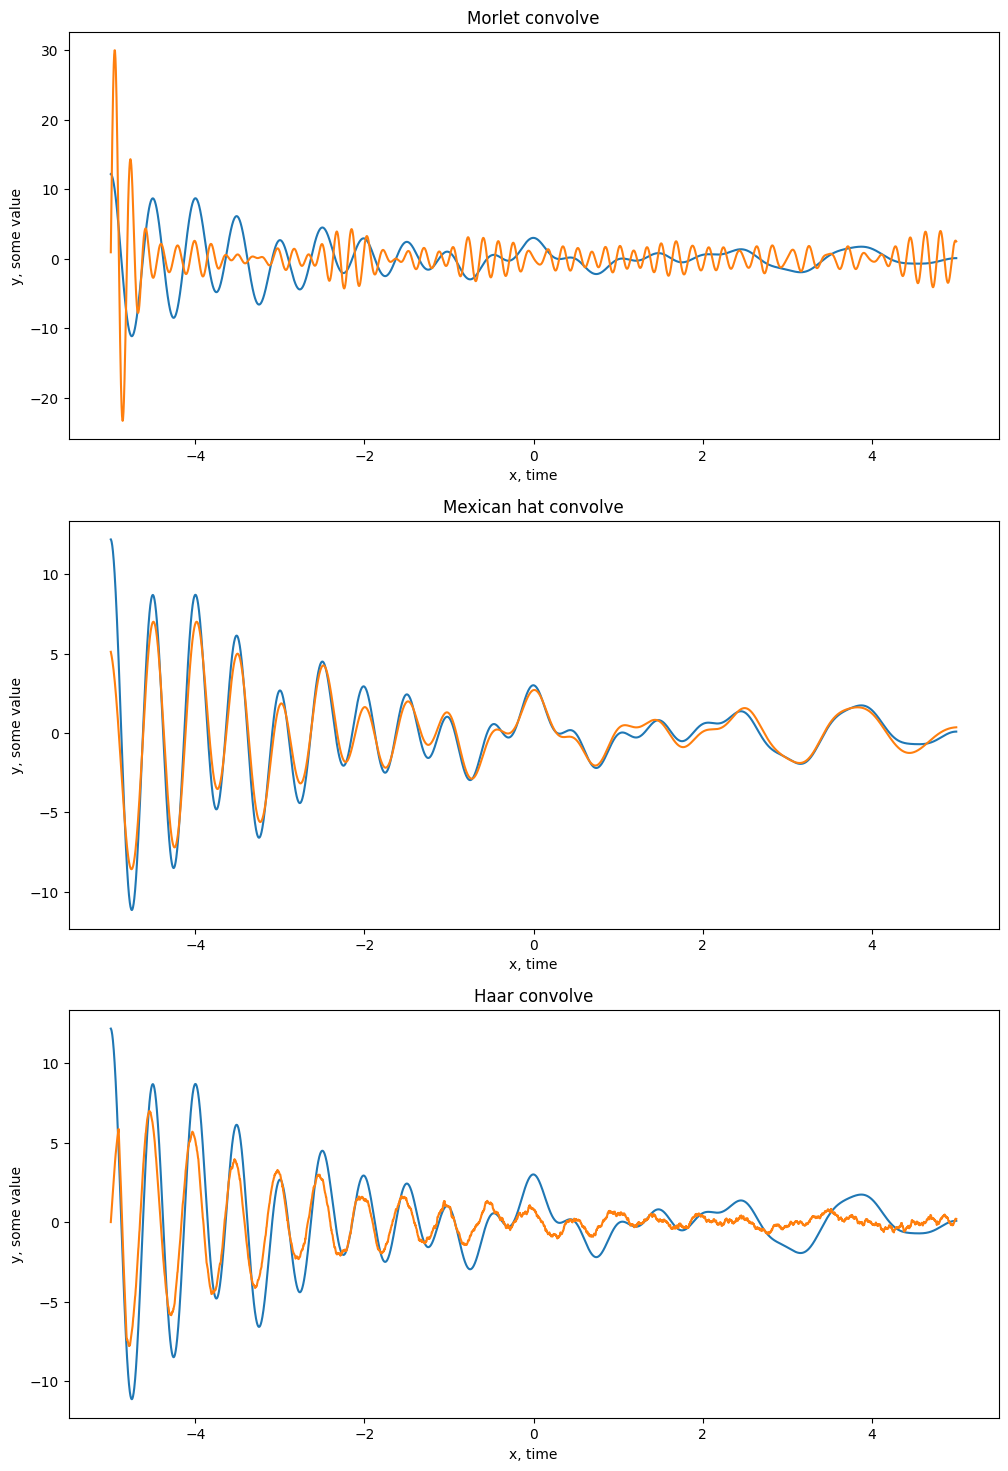

In [14]:
conv_morlet = np.convolve(y_cos_noise, kernel_morlet, mode='same')
conv_mexican_hat = np.convolve(y_cos_noise, kernel_mexican_hat, mode='same')
conv_haar = np.convolve(y_cos_noise, kernel_haar, mode='same')

conv_morlet *= 30 / max(conv_morlet)
conv_mexican_hat *= 7 / max(conv_mexican_hat)
conv_haar *= 7 / max(conv_haar)


plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(x_cos, y_cos)
plt.plot(x_cos, conv_morlet)
plt.title("Morlet convolve")
plt.xlabel("x, time")
plt.ylabel("y, some value")

plt.subplot(312)
plt.plot(x_cos, y_cos)
plt.plot(x_cos, conv_mexican_hat)
plt.title("Mexican hat convolve")
plt.xlabel("x, time")
plt.ylabel("y, some value")

plt.subplot(313)
plt.plot(x_cos, y_cos)
plt.plot(x_cos, conv_haar)
plt.title("Haar convolve")
plt.xlabel("x, time")
plt.ylabel("y, some value")

plt.show()

In [33]:
def changing_cos(x):
    f = np.exp(x / 10 + 1)
    w = 2 * np.pi * f
    return np.cos(w * x)

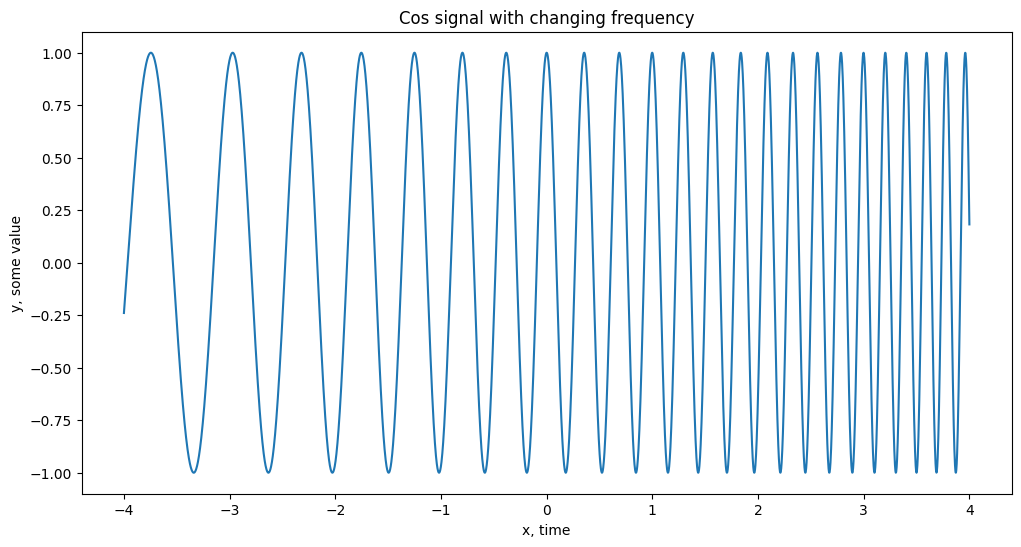

In [34]:
arg_changing = np.linspace(-4, 4, 4000)
y_changing = changing_cos(arg_changing)

plt.figure(figsize=(12, 6))
plt.plot(arg_changing, y_changing)
plt.title("Cos signal with changing frequency")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()